In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
raw_list = pd.read_csv("https://data.insideairbnb.com/mexico/df/mexico-city/2024-06-27/data/listings.csv.gz", compression='gzip')
clean_list = pd.read_csv("https://data.insideairbnb.com/mexico/df/mexico-city/2024-06-27/visualisations/listings.csv") 
calendar_data = pd.read_csv("https://data.insideairbnb.com/mexico/df/mexico-city/2024-06-27/data/calendar.csv.gz", compression='gzip')
reviews_data = pd.read_csv("https://data.insideairbnb.com/mexico/df/mexico-city/2024-06-27/data/reviews.csv.gz", compression='gzip')

In [3]:
clean_list.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,35797,Villa Dante,153786,Dici,NaN,Cuajimalpa de Morelos,19.38283,-99.27178,Entire home/apt,3663.0,1,0,NaN,NaN,1,363,0,NaN
1,898633,City SkyLine View from 1 Bedroom Apt in CDMX,4796027,Marco,NaN,Cuauhtémoc,19.42063,-99.16586,Entire home/apt,1652.0,3,56,2024-04-17,0.41,3,262,3,NaN
2,44616,CONDESA HAUS B&B,196253,Fernando,NaN,Cuauhtémoc,19.41162,-99.17794,Entire home/apt,18000.0,1,64,2023-03-26,0.42,13,364,0,NaN
3,913084,15 blocks from Paseo de la Reforma,4647293,Martina,NaN,Miguel Hidalgo,19.43956,-99.17263,Entire home/apt,814.0,2,161,2024-05-21,1.19,1,236,6,NaN
4,67703,"2 bedroom apt. deco bldg, Condesa",334451,Nicholas,NaN,Cuauhtémoc,19.41152,-99.16857,Entire home/apt,1923.0,2,49,2024-05-05,0.32,2,361,4,NaN


In [62]:
calendar_data.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,44616,2024-06-28,f,"$18,000.00",NaN,1.0,365.0
1,898633,2024-06-28,f,$93.00,NaN,3.0,48.0
2,898633,2024-06-29,f,$93.00,NaN,3.0,48.0
3,898633,2024-06-30,f,$93.00,NaN,3.0,48.0
4,898633,2024-07-01,f,$93.00,NaN,3.0,48.0


In [63]:
reviews_data.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,44616,706908,2011-11-09,634733,Lindsay,Forget staying in a hotel. Stay at condesa hau...
1,44616,2006160,2012-08-16,3087087,Samuel,"Fantastic location, great place, friendly host..."
2,44616,3174954,2012-12-28,3234920,Anna,I would highly recommend Condesa Haus for anyo...
3,44616,3271579,2013-01-04,2199822,Shelley And Pall,Great stay. Thanks. Highly recommend.
4,44616,3841065,2013-03-19,2423825,Leonardo,This was not a very good experience I am afrai...


In [64]:
clean_list.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,2.653600e+04,2.653600e+04,0.0,26536.000000,26536.000000,23338.000000,26536.000000,26536.000000,22664.000000,26536.000000,26536.000000,26536.000000,0.0
mean,4.956689e+17,2.123046e+08,NaN,19.404955,-99.166668,1476.971549,4.697468,43.449578,1.699520,17.181339,224.189554,13.626545,NaN
std,4.691108e+17,1.805693e+08,NaN,0.042541,0.033368,4171.864583,24.153744,73.179189,1.907854,43.290729,124.676776,19.903617,NaN
min,3.579700e+04,7.365000e+03,NaN,19.177848,-99.339630,105.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,NaN
25%,3.897687e+07,5.040013e+07,NaN,19.390633,-99.179140,600.000000,1.000000,3.000000,0.420000,1.000000,116.000000,0.000000,NaN
50%,6.318684e+17,1.554764e+08,NaN,19.414940,-99.167606,991.000000,2.000000,15.000000,1.130000,3.000000,261.000000,5.000000,NaN
75%,9.400505e+17,3.684842e+08,NaN,19.431830,-99.154508,1552.000000,2.000000,53.000000,2.410000,11.000000,345.000000,20.000000,NaN
max,1.187619e+18,5.857181e+08,NaN,19.561010,-98.963360,416684.000000,1125.000000,1277.000000,44.440000,267.000000,365.000000,382.000000,NaN


In [65]:
calendar_data.describe()

,listing_id,adjusted_price,minimum_nights,maximum_nights
count,9.685643e+06,0.0,9.685642e+06,9.685642e+06
mean,4.956689e+17,NaN,4.427337e+00,7.630782e+02
std,4.691020e+17,NaN,2.350034e+01,4.712598e+02
min,3.579700e+04,NaN,1.000000e+00,1.000000e+00
25%,3.897689e+07,NaN,1.000000e+00,3.650000e+02
50%,6.318825e+17,NaN,2.000000e+00,1.125000e+03
75%,9.400522e+17,NaN,2.000000e+00,1.125000e+03
max,1.187619e+18,NaN,1.500000e+03,9.999000e+03


In [66]:
reviews_data.describe()

,listing_id,id,reviewer_id
count,1.152978e+06,1.152978e+06,1.152978e+06
mean,1.990316e+17,6.050213e+17,2.000617e+08
std,3.501953e+17,4.306911e+17,1.617845e+08
min,4.461600e+04,4.029310e+05,1.800000e+01
25%,2.282643e+07,7.080551e+08,5.703857e+07
50%,3.938856e+07,7.261545e+17,1.605874e+08
75%,5.520875e+17,9.863415e+17,3.219936e+08
max,1.185596e+18,1.188602e+18,5.856845e+08


In [13]:
print(f"Clean dataframe dimensions: {clean_list.shape}")
print(f"Raw dataframe dimensions: {raw_list.shape}")
print(f"Calendar dataframe dimensions: {calendar_data.shape}")
print(f"Reviews dataframe dimensions: {reviews_data.shape}")

Clean dataframe dimensions: (26536, 18)
Raw dataframe dimensions: (26536, 75)
Calendar dataframe dimensions: (9685643, 7)
Reviews dataframe dimensions: (1152978, 6)


In [61]:
print(f"Columns for clean dataframe: {list(clean_list.columns)}\n")
print(f"Columns for raw dataframe: {list(raw_list.columns)}\n")
print(f"Columns for calendar dataframe: {list(calendar_data.columns)}\n")
print(f"Columns for reviews dataframe: {list(reviews_data.columns)}\n")



Columns for clean dataframe: ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', 'license']

Columns for raw dataframe: ['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_

In [19]:
#Valores nulos
clean_list.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group               26536
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                              3198
minimum_nights                        0
number_of_reviews                     0
last_review                        3872
reviews_per_month                  3872
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           26536
dtype: int64

In [26]:
raw_selection = raw_list.loc[:,['id', 'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
             'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities',
             'price', 'minimum_nights', 'maximum_nights', 'instant_bookable']].copy()

In [27]:
raw_selection['price'] = raw_selection['price'].str.replace(r'[\$,]', '', regex=True).astype(float)

In [31]:
raw_selection.head()


,id,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,instant_bookable
0,898633,Cuauhtémoc,19.42063,-99.16586,Entire rental unit,Entire home/apt,2,1.0,1.0,2.0,"[""40 inch HDTV with Amazon Prime Video, Netfli...",1652.0,3,48,f
1,35797,Cuajimalpa de Morelos,19.38283,-99.27178,Entire villa,Entire home/apt,2,1.0,1.0,1.0,"[""Hot water"", ""Washer"", ""Bed linens"", ""Wifi"", ...",3663.0,1,7,f
2,44616,Cuauhtémoc,19.41162,-99.17794,Entire home,Entire home/apt,14,5.5,5.0,8.0,"[""Wifi"", ""Coffee maker: Nespresso"", ""Host gree...",18000.0,1,365,f
3,913084,Miguel Hidalgo,19.43956,-99.17263,Entire serviced apartment,Entire home/apt,4,1.0,2.0,3.0,"[""Wifi"", ""Host greets you"", ""Coffee maker"", ""S...",814.0,2,1125,t
4,67703,Cuauhtémoc,19.41152,-99.16857,Entire rental unit,Entire home/apt,4,1.0,2.0,2.0,"[""Wifi"", ""Coffee maker"", ""Sound system"", ""Clot...",1923.0,2,30,f


In [56]:
def genera_box_plots(df, var_categorica):
    plt.figure(figsize=(10,6))
    sns.boxplot(x=df[var_categorica], y=np.log(df['price']))
    plt.xticks(rotation=90)
    plt.title(f'Boxplot of Price (log) by {var_categorica}')
    plt.show()

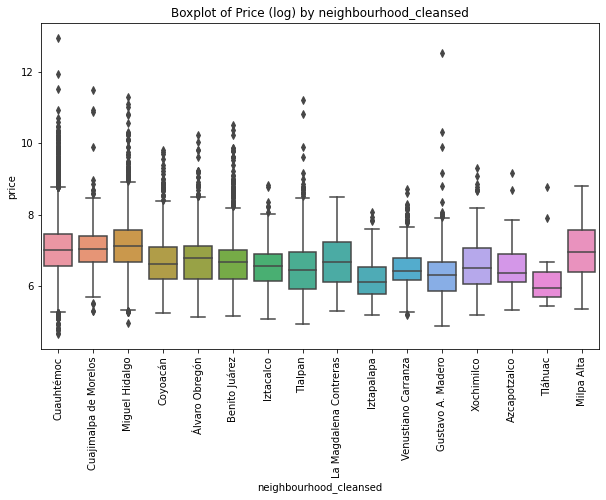

In [57]:
genera_box_plots(raw_selection, 'neighbourhood_cleansed')

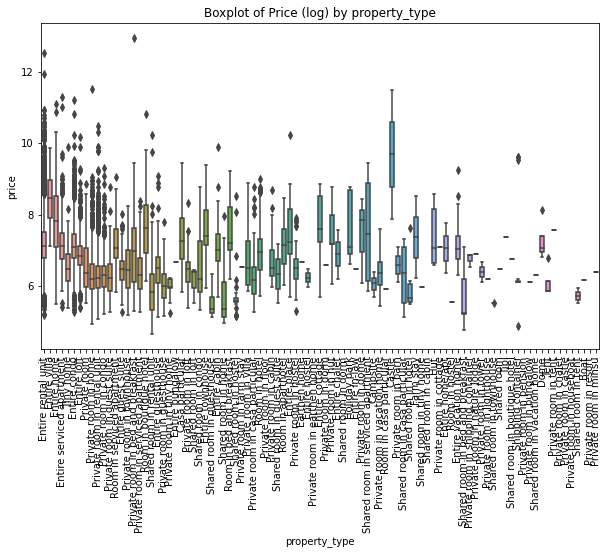

In [52]:
genera_box_plots(raw_selection, 'property_type')

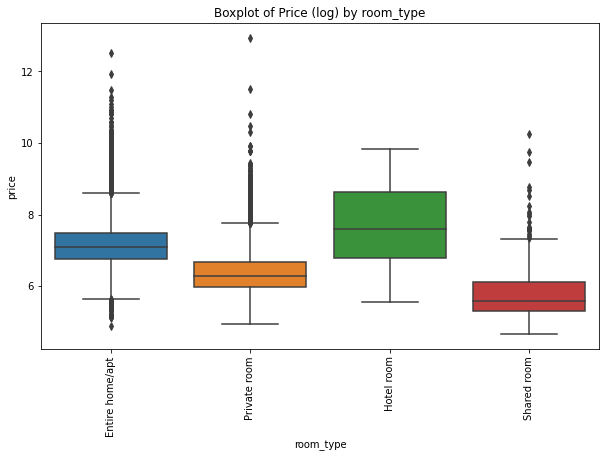

In [47]:
genera_box_plots(raw_selection, 'room_type')

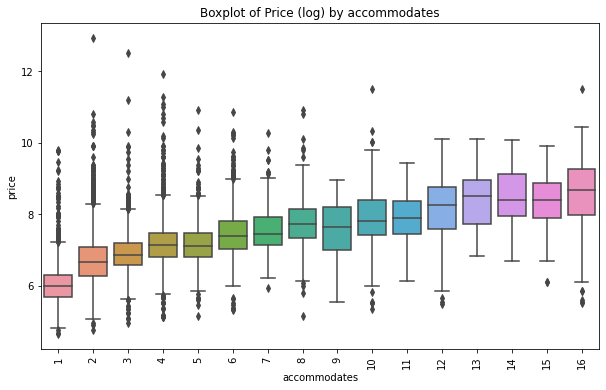

In [48]:
genera_box_plots(raw_selection, 'accommodates')

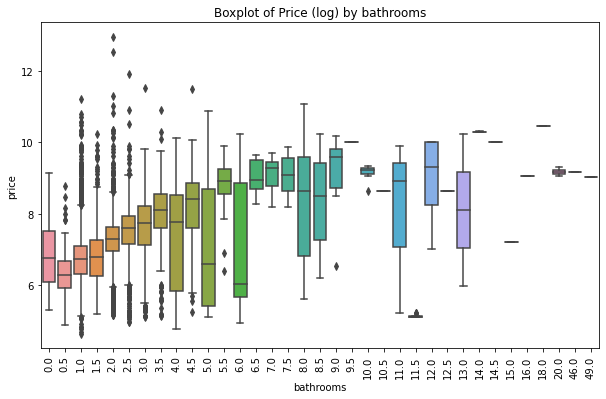

In [49]:
genera_box_plots(raw_selection, 'bathrooms')

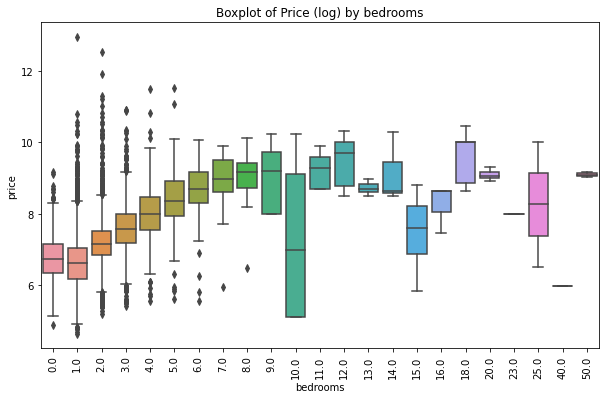

In [50]:
genera_box_plots(raw_selection, 'bedrooms')

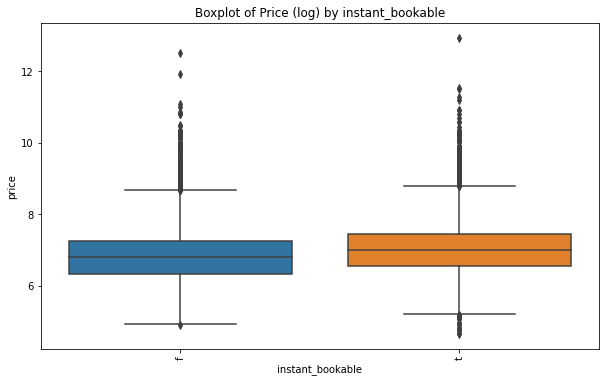

In [51]:
genera_box_plots(raw_selection, 'instant_bookable')